<h1>What are the main characteristics that have the most impact on the car price?</h1>


<h2>1. Import file</h2>


In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("C:\\Users\\dalma\\Downloads\\clean_df.csv")
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


Import visualization packages "Matplotlib" and "Seaborn".

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [9]:
# list the data types for each column
print(df.dtypes)

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
dtype: object


## Correlations

We can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [10]:
df.corr()

C:\Users\dalma\AppData\Local\Temp\ipykernel_17476\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.163636,0.144301,-0.022505,-0.195662,0.027956,0.020344,-0.118214,-0.099157,0.121454,-0.121454
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458


Correlations between differents variables:

In [11]:
# Write your code below and press Shift+Enter to execute 
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187923,0.098322
compression-ratio,0.001263,0.187923,1.000000,-0.214489
horsepower,0.566903,0.098322,-0.214489,1.000000


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>


Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "engine-size" and "price".


(0.0, 53369.13793606641)

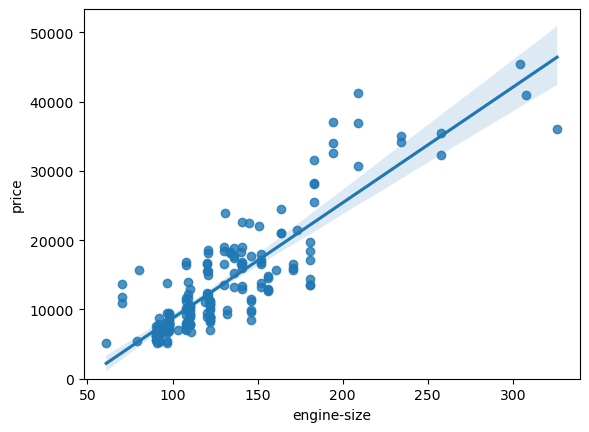

In [12]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>


We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.


In [13]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".


<Axes: xlabel='highway-mpg', ylabel='price'>

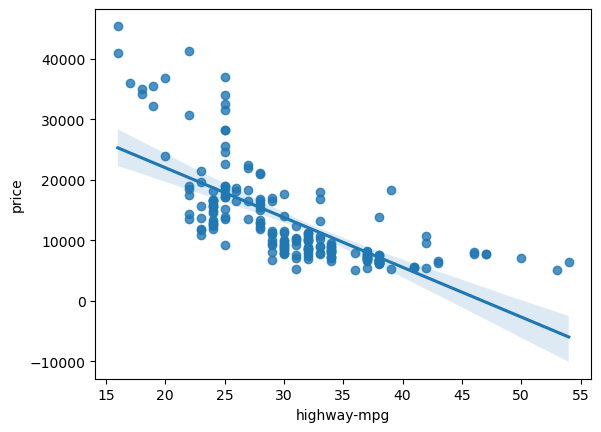

In [14]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p>As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>


We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.


In [15]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Weak Linear Relationship</h3>


Let's see if "peak-rpm" is a predictor variable of "price".


<Axes: xlabel='peak-rpm', ylabel='price'>

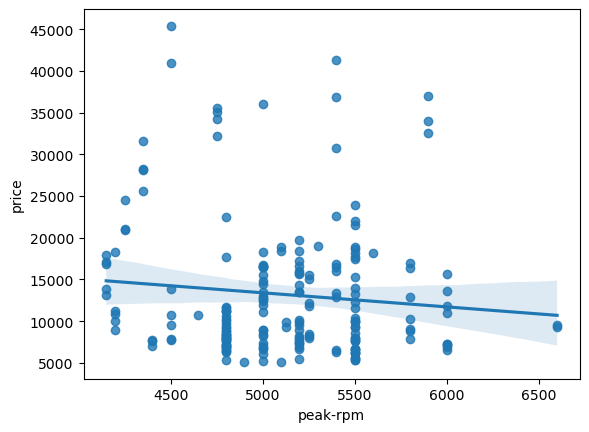

In [16]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.


In [17]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [18]:
# Write your code below and press Shift+Enter to execute
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='stroke', ylabel='price'>

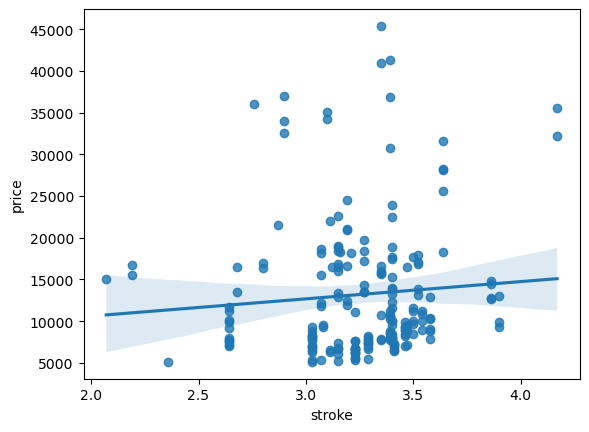

In [19]:
# Write your code below and press Shift+Enter to execute 
sns.regplot(x="stroke", y="price", data=df)

<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


Let's look at the relationship between "body-style" and "price".


<AxesSubplot:xlabel='body-style', ylabel='price'>

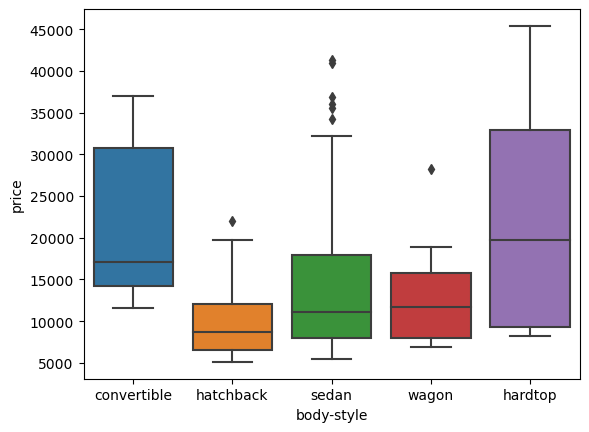

In [22]:
sns.boxplot(x="body-style", y="price", data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>


<Axes: xlabel='engine-location', ylabel='price'>

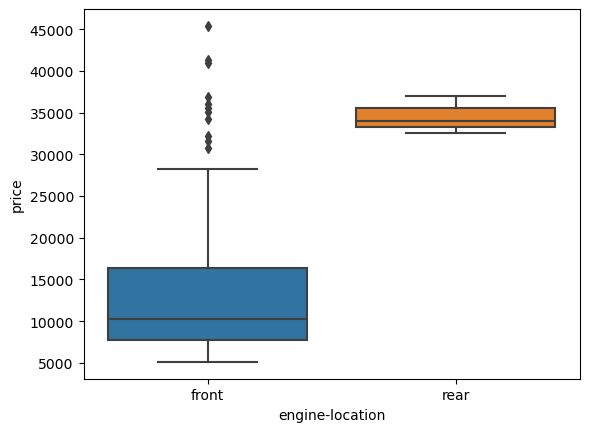

In [20]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


Let's examine "drive-wheels" and "price".


<Axes: xlabel='drive-wheels', ylabel='price'>

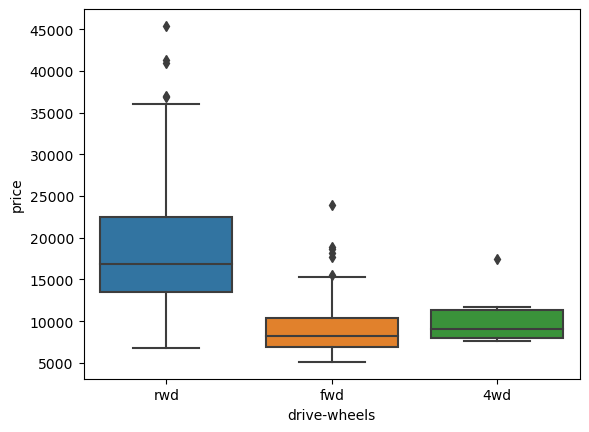

In [21]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


We can apply the method "describe" as follows:


In [22]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [23]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,153


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['drive-wheels']</code>, not two brackets <code>df[['drive-wheels']]</code>.</p>


In [24]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We can convert the series to a dataframe as follows:


In [25]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts'.


In [26]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Now let's rename the index to 'drive-wheels':


In [27]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location'.


In [28]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>


In [29]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>


In [31]:
df_group_one = df[['drive-wheels','body-style','price']]

We can then calculate the average price for each of the different categories of data.


In [32]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

C:\Users\dalma\AppData\Local\Temp\ipykernel_17476\1990336142.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>It seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>Group by multiple variables is also possible. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.</p>


In [33]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:</p>


In [34]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well.


In [35]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [38]:
# grouping results
df_select=df[['body-style','price']]
df_grouped=df_select.groupby(['body-style'], as_index=False).mean()
df_grouped.head(10)
                                

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


### NOW LET'S SEE THE INFOMATION GRAPHICALLY

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: Drive Wheels and Body Style vs. Price</h4>


Let's use a heat map to visualize the relationship between Body Style vs Price.


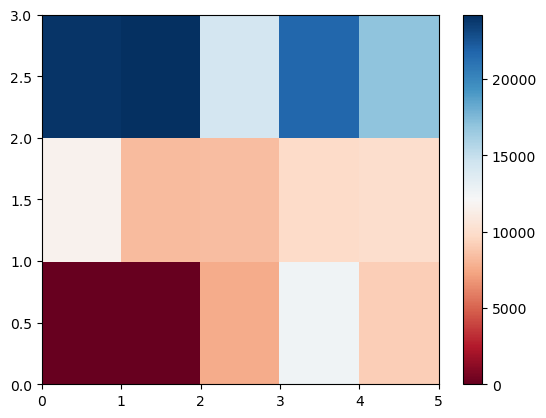

In [41]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


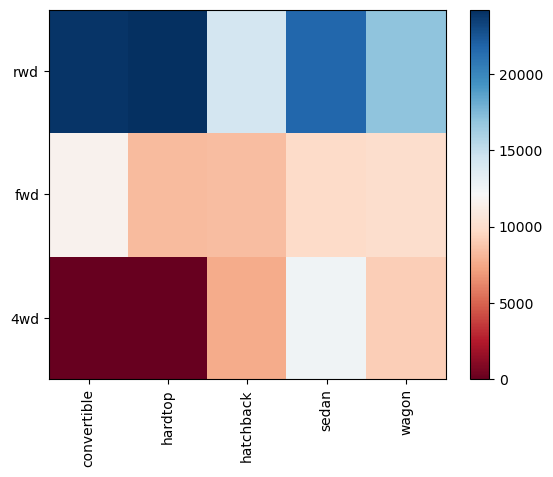

In [42]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Graph above infers that:

    - Covertible cars with rwd drive-wheels have the highest prices
    - Lowest prices are on convertible and hardtop 4wd cars
    - Fwd driver-wheels have similar prices through all body-styles. 

<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [43]:
df.corr()

C:\Users\dalma\AppData\Local\Temp\ipykernel_17476\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.163636,0.144301,-0.022505,-0.195662,0.027956,0.020344,-0.118214,-0.099157,0.121454,-0.121454
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458


Sometimes we would like to know the significant of the correlation estimate.


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.


In [44]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.


In [46]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


<h3>Horsepower vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.


In [47]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650504e-48


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


<h3>Length vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.


In [48]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158986e-30


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h3>Width vs. Price</h3>


Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':


In [49]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38


#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (\~0.751).


### Curb-Weight vs. Price


Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':


In [50]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936914e-53


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':


In [51]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':


In [52]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


We can relate the process for each 'city-mpg'  and 'highway-mpg':


<h3>City-mpg vs. Price</h3>


In [53]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>


<h3>Highway-mpg vs. Price</h3>


In [56]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589534  with a P-value of P =  1.749547114447437e-31


#### Conclusion:

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.
